In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv(r"D:\Shrey\CETPA\Machine Learning\Data Sets\Exp Salary.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


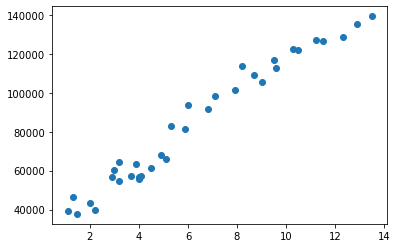

In [7]:
plt.scatter(df.YearsExperience,df.Salary)

In [10]:
km = KMeans(n_clusters = 4)
km

KMeans(n_clusters=4)

In [13]:
y_predicted = km.fit_predict(df[['YearsExperience','Salary']])
y_predicted

array([1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
df['cluster'] = y_predicted
df.head()

,YearsExperience,Salary,cluster
0,1.1,39343,1
1,1.3,46205,1
2,1.5,37731,1
3,2.0,43525,1
4,2.2,39891,1


No handles with labels found to put in legend.


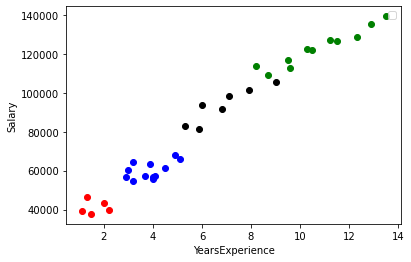

In [19]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
df4 = df[df.cluster == 3]
plt.scatter(df1.YearsExperience,df1['Salary'], color='green')
plt.scatter(df2.YearsExperience,df2['Salary'], color='red')
plt.scatter(df3.YearsExperience,df3['Salary'], color='black')
plt.scatter(df4.YearsExperience,df4['Salary'], color='blue')

plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()

In [22]:
scaler = MinMaxScaler()
scaler.fit(df[['Salary']])
df['Salary'] = scaler.transform(df[['Salary']])

scaler.fit(df[['YearsExperience']])
df['YearsExperience'] = scaler.transform(df[['YearsExperience']])
df.head()

,YearsExperience,Salary,cluster
0,0.000000,0.015845,1
1,0.016129,0.083296,1
2,0.032258,0.000000,1
3,0.072581,0.056952,1
4,0.088710,0.021232,1


In [23]:
km = KMeans(n_clusters = 4)
y_predicted = km.fit_predict(df[['YearsExperience','Salary']])
y_predicted

array([0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3])

In [24]:
df['cluster'] = y_predicted
df.head()

,YearsExperience,Salary,cluster
0,0.000000,0.015845,0
1,0.016129,0.083296,0
2,0.032258,0.000000,0
3,0.072581,0.056952,0
4,0.088710,0.021232,0


No handles with labels found to put in legend.


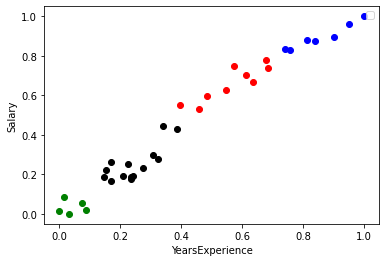

In [26]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]
plt.scatter(df1.YearsExperience,df1['Salary'], color='green')
plt.scatter(df2.YearsExperience,df2['Salary'], color='red')
plt.scatter(df3.YearsExperience,df3['Salary'], color='black')
plt.scatter(df4.YearsExperience,df4['Salary'], color='blue')

plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()

In [27]:
km.cluster_centers_ #to find the cntroid in clusters

array([[0.04193548, 0.03546504],
       [0.56362007, 0.65978489],
       [0.24366359, 0.25080532],
       [0.85829493, 0.89610722]])

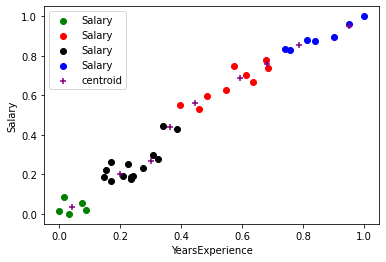

In [33]:
#Plot Centroids in clusters
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
plt.scatter(df1.YearsExperience,df1['Salary'], color='green', label='Salary')
plt.scatter(df2.YearsExperience,df2['Salary'], color='red', label='Salary')
plt.scatter(df3.YearsExperience,df3['Salary'], color='black', label='Salary')
plt.scatter(df4.YearsExperience,df4['Salary'], color='blue', label='Salary')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='+',label='centroid')

plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()


In [34]:
#algo_plot method in real time data to find the no. of clusters
K_rng = range(1,10)
sse = []
for k in K_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['YearsExperience','Salary']])
    sse.append(km.inertia_)

In [31]:
sse

[6.293685484541875,
 1.292690919141886,
 0.6527227565513627,
 0.4101141952961811,
 0.21368181551259904,
 0.15567285506853223,
 0.11581940497265915,
 0.08849338117507209,
 0.07539867796407222]

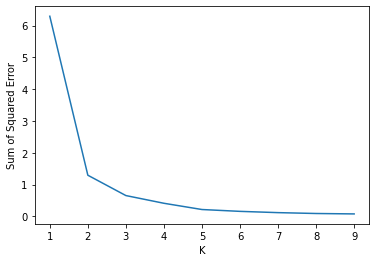

In [32]:
plt.xlabel('K')
plt.ylabel("Sum of Squared Error")
plt.plot(K_rng,sse)